In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

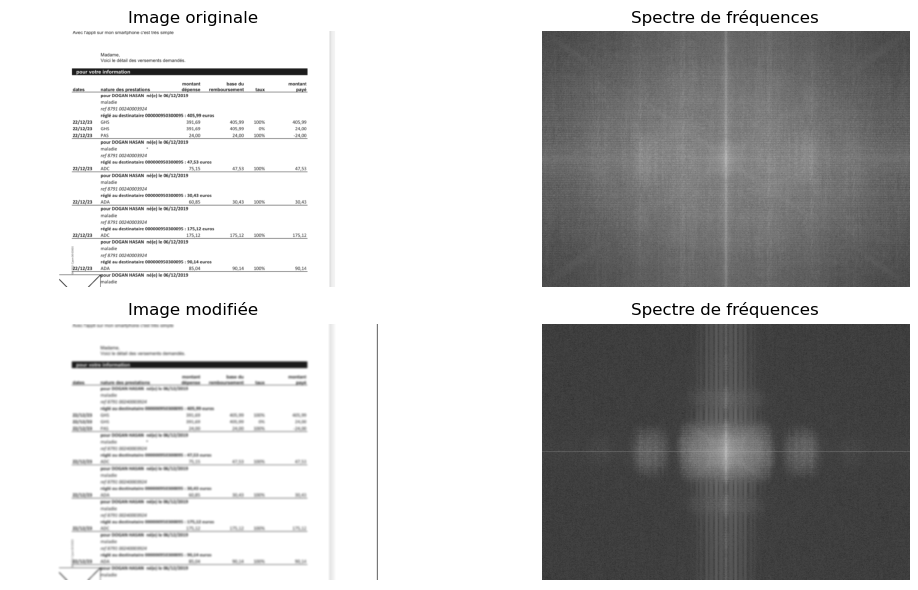

L'image originale n'est pas floue.
L'image modifiée est floue.


In [71]:
# Charger l'image en niveaux de gris
image_1 = cv2.imread('faux_test.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('faux_test_modified.png', cv2.IMREAD_GRAYSCALE)


def blur_detection(image):
    # Appliquer la transformée de Fourier 2D
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    # Calculer la métrique de netteté
    sharpness_metric = np.mean(magnitude_spectrum)
    
    return sharpness_metric

# Charger les images en niveaux de gris
image_1 = cv2.imread('faux_test.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('faux_test_modified.png', cv2.IMREAD_GRAYSCALE)

# Détecter le flou dans les images
sharpness_1 = blur_detection(image_1)
sharpness_2 = blur_detection(image_2)

# Définir un seuil pour déterminer si l'image est floue
seuil = 150  # Ajustez ce seuil selon vos besoins

# Afficher les images avant et après le traitement avec la FFT
plt.figure(figsize=(12, 6))

# Afficher l'image originale et son spectre de fréquences
plt.subplot(2, 2, 1)
plt.imshow(image_1, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(np.fft.fft2(image_1)))), cmap='gray')
plt.title('Spectre de fréquences')
plt.axis('off')

# Afficher l'image modifiée et son spectre de fréquences
plt.subplot(2, 2, 3)
plt.imshow(image_2, cmap='gray')
plt.title('Image modifiée')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(np.fft.fft2(image_2)))), cmap='gray')
plt.title('Spectre de fréquences')
plt.axis('off')

plt.tight_layout()
plt.show()

# Afficher les résultats de la détection de flou
if sharpness_1 < seuil:
    print("L'image originale est floue.")
else:
    print("L'image originale n'est pas floue.")

if sharpness_2 < seuil:
    print("L'image modifiée est floue.")
else:
    print("L'image modifiée n'est pas floue.")
